In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

#from astropy.io import fits
from keckcode_test.keckcode.esiredux import esi2d
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d
#from specim.specfuncs import spec1d, specset1d

In [ ]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [ ]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'Feige110' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
        #print(p)

In [ ]:
spec = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[1])
print(spec2d_file_list[0])
print(var2d_file_list[1])

In [ ]:
pixrange = [(1900, 2400)]
sp_list = [spec[1], spec[2], spec[5],spec[6], spec[8], spec[9]]
sp_info = [spec.ordinfo[1], spec.ordinfo[2], spec.ordinfo[5], spec.ordinfo[6], spec.ordinfo[8],
          spec.ordinfo[9]]
for sp, info in zip(sp_list, sp_info):
    title = 'Spatial profile for ' + str(info['name'])
    sp.spatial_profile(pixrange=pixrange[0], title=title)
    plt.show()
    sp.initial_model()

In [ ]:
outspec = spec.extract_all(method='cdf', plot_profiles=False, plot_traces=True, plot_extracted=False,
                          stepsize=20)

In [2]:
fg_spec = echelle1d.Ech1d('spec1d_feige110_esi_26.fits')

Opening echelle spectrum file: spec1d_feige110_esi_26.fits

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  0  1500   4071.46  4310.06   0.16
  1  2000   4240.70  4575.32   0.17
  2  2400   4546.04  4979.85   0.18
  3  2896   4902.88  5472.92   0.20
  4  2996   5325.24  5967.01   0.21
  5  3196   5810.63  6560.55   0.23
  6  3496   6380.37  7286.41   0.26
  7  3896   7066.66  8193.74   0.29
  8  4096   8012.11  9360.83   0.33
  9  4096   9337.74 10909.62   0.38


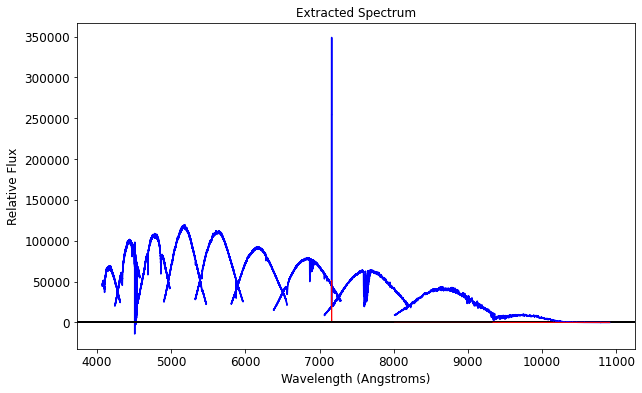

In [3]:
fg_spec.plot_all(fig=plt.figure(figsize=(10, 6)), ax=plt.subplot(111))

<IPython.core.display.Javascript object>


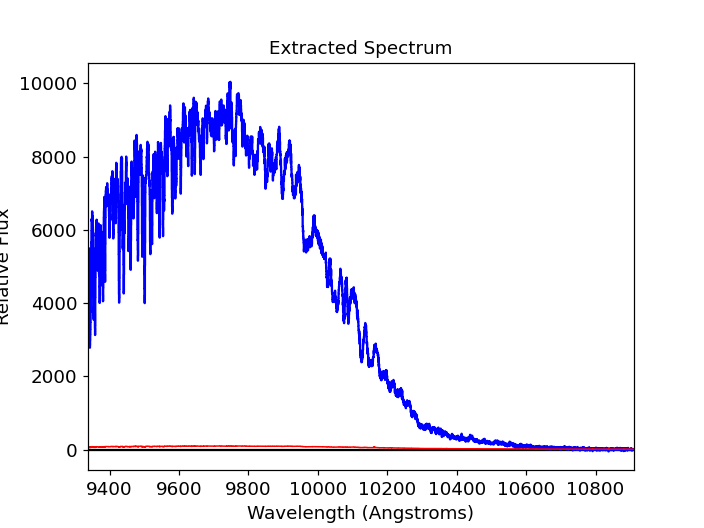

In [113]:
#%matplotlib notebook
fg_spec[9].plot()

In [4]:
wav_range = [[(4090.55, 4127.02, 15, 25)], [(4328.8, 4363.7, 40), (4466.80, 4479.28, 40, 20), 
              (4500.8, 4543.0, 20, 25)], [(4672.1, 4696.6, 30), (4844.7, 4880.7, 40)], 
             [(5322.1, 5337.7, 20), (5398.0, 5425.0, 20)], [(5396, 5424, 25), (5866.5, 5904.6, 20)],
             [(5867.0, 5904.0, 25), (6266.0, 6330.7, 25)], [(6529.0, 6599.0, 25), (6847.0, 6991.0, 50),
              (7056.0, 7076.3, 15), (7095.0, 7111.3, 15), (7163.4, 7282.6, 40, 2)],
             [(7158.0, 7168.0, 25), (7571.4, 7720.0, 50)], None,
             None] 
#(9264.0, 9361.0, 100, 0), (8492.0, 9183.0, 200,15), , (9784.0, 10190.0, 100)
# [(8198.0, 8242.0, 20), (8905.0, 9066.0, 100)]
#[(9341.7, 9576.0, 2, 50)]

In [5]:
for i, sp in enumerate(fg_spec):
    if wav_range[i] is not None:
        clst_wav_range, wav_index = sp.closest_wavrange(wav_range[i], verbose=False)
        #sp.plot_maskedreg(clst_wav_range)
    
        bkgwidth =[]
        for i, p in enumerate(wav_range[i]):

            if len(p)==4:
                bkgwidth.append([p[2], p[3]])
            elif len(p)==3:
                bkgwidth.append(p[2])
            else:
                bkgwidth.append(50)
        #print(bkgwidth)

        for j, (p, r) in enumerate(zip(clst_wav_range, bkgwidth)):

            linereg = np.array([p[0], p[1]])
            #print(linereg, r)

            sp.mask_line(linereg, r)
        #sp.plot()
    else:
        print('\nno lines to mask for order %d' %(i+1))


no lines to mask for order 9

no lines to mask for order 10


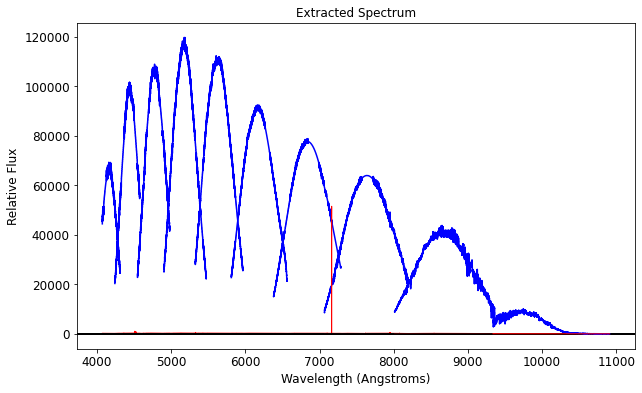

In [6]:
fg_spec.plot_all(fig=plt.figure(figsize=(10, 6)), ax=plt.subplot(111))

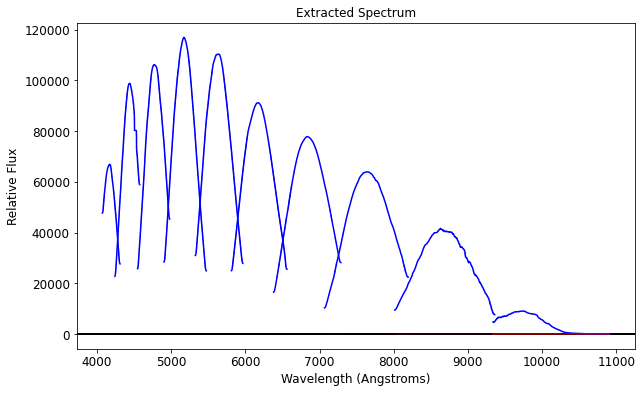

In [68]:
fg_spec.plot_all(fig=plt.figure(figsize=(10, 6)), ax=plt.subplot(111), smo=151)

In [7]:
calb_spec = spec1d.Spec1d('../other_spectra/feige110_ir_osp.fits', informat='fitsflux')


Reading spectrum from ../other_spectra/feige110_ir_osp.fits
Expected file format: fitsflux
 Spectrum Start:  3200.00
 Spectrum End:    11200.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00



In [8]:
modlines = [(3767.46, 4131.49, 100, 100), (4306.29, 4390.99, 100, 100), (4812.93, 4904.51,100 ,100),
            (6524.47, 6619.27, 100, 100)]

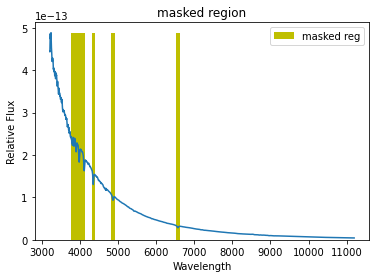

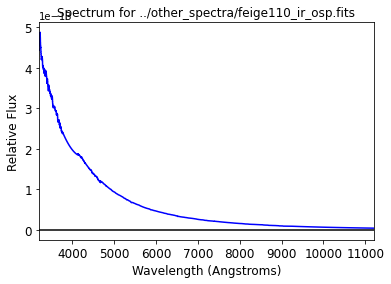

In [9]:
clst_wav_range, wav_index = calb_spec.closest_wavrange(modlines, verbose=False)
calb_spec.plot_maskedreg(clst_wav_range)

bkgwidth =[]
for i, p in enumerate(modlines):

    if len(p)==4:
        bkgwidth.append([p[2], p[3]])
    elif len(p)==3:
        bkgwidth.append(p[2])
    else:
        bkgwidth.append(100)
#print(bkgwidth)

for j, (p, r) in enumerate(zip(clst_wav_range, bkgwidth)):

    linereg = np.array([p[0], p[1]])
    #print(linereg, r)

    calb_spec.mask_line(linereg, r)
calb_spec.plot()

In [ ]:
calb_spec.smooth(20)

In [ ]:
calb_spec.plot(usesmooth=True)

In [ ]:
plt.plot(calb_spec.smospec['wav'], calb_spec.smospec['flux'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


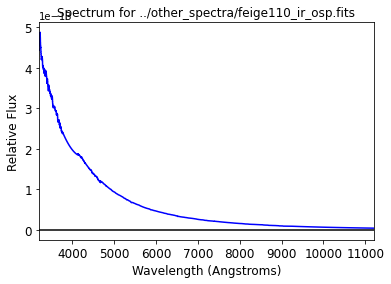

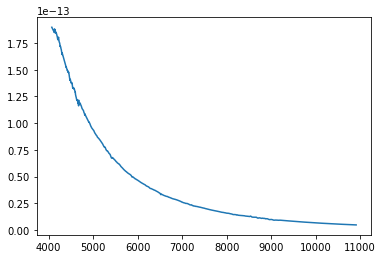

3.145294572257439e-14

In [10]:
w0 = np.log10(fg_spec[0]['wav'][0])
w1 = np.log10(fg_spec[-1]['wav'][-1])
outwav = np.arange(w0, w1, 1.65e-5)
outwav = 10**outwav
calb_spec.resample(owave=outwav)
calb_spec.plot()
plt.figure()
plt.plot(calb_spec.rswav, calb_spec.rsflux)
plt.show()
norm = np.median(calb_spec.rsflux)
norm

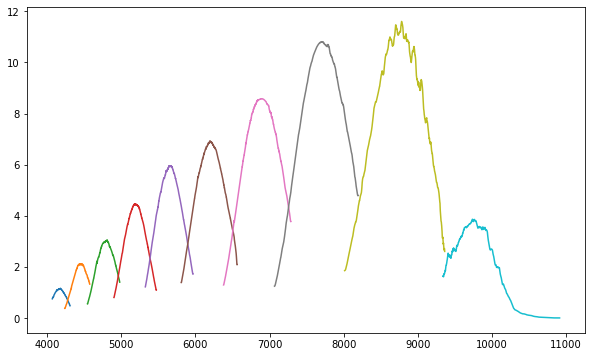

In [11]:
response_curve = []
plt.figure(figsize=(10, 6))
for i, sp in enumerate(fg_spec):
    calb_spec.resample(owave=sp['wav'], verbose=False)
    #print(calb_spec['wav'], calb_spec['flux'])
    #print(calb_spec.rswav, calb_spec.rsflux)
    if i < 7:
        sp.smooth(21, doplot=False)
    else:
        sp.smooth(101, doplot=False)
    sp_flux = sp.smospec['flux']
    #sp.plot()
    #plt.figure()
    #plt.plot(sp.smospec['wav'], sp.smospec['flux'])
    response_curve.append(sp_flux / (calb_spec.rsflux /(norm*10**-4)))
    #response_curve.append(sp['flux'] / (calb_spec.rsflux /(norm*10**-2)))
    #response_curve.append(sp_flux / (calb_spec.rsflux /(np.median(calb_spec.rsflux)*10**-4)))
    #plt.figure()
    #plt.plot(sp['wav'], sp['flux'] /response_curve[i])
    #plt.figure()
    plt.plot(sp['wav'], response_curve[i])
    #plt.plot(sp['wav'], (calb_spec.rsflux /np.median(calb_spec.rsflux)))

In [12]:
#np.savetxt('response_curve_ESI_optimal.txt', response_curve)
r = []
for i, p in enumerate(response_curve):
    #print(len(p))
    p = np.pad(p, (0,4096-len(p)))
    r.append(p.tolist())

In [13]:
np.savetxt('response_curve_ESI_optimal_smooth.txt', np.array(r, dtype='object'), fmt='%s')

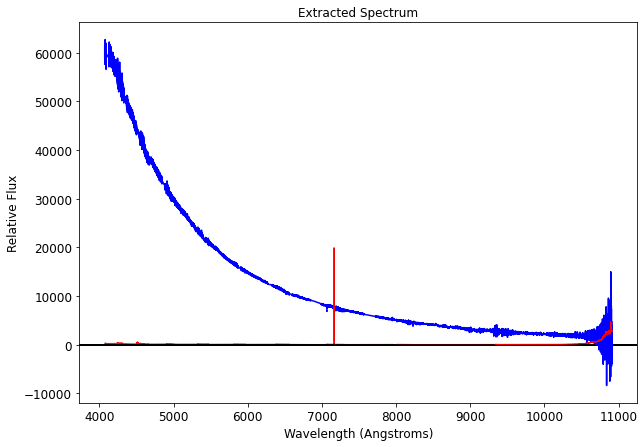

 Spectrum Start:  4071.46
 Spectrum End:    10909.62
 Dispersion (1st pixel):   0.15
 Dispersion (average):      0.26



In [14]:
fg_spec.stitch_to_spec1d(respfile='response_curve_ESI_optimal_smooth.txt')

In [ ]:
%matplotlib notebook
fg_spec.spec1d.plot(fig=plt.figure(figsize=(10,7)))

In [ ]:
plt.plot(fg_spec.spec1d['wav'], fg_spec.spec1d['flux'])

In [ ]:
fu = np.loadtxt('response_curve_ESI_optimal.txt')

In [ ]:
for i, p in enumerate(response_curve):
    #print(len(p))
    pass
resp_curve = []
for i, p in enumerate(fu[:3]):
    #print(len(p))
    resp_curve.append(np.trim_zeros(p, 'b'))
    #print(len(p))
    #print(p)

In [ ]:
resp_curve[1]

In [ ]:
p  = [0, 1, 3, 0 , 4, 7, 0]
np.trim_zeros(p, 'b')

In [ ]:
ll = [print(sum(p!=0)) for i, p in enumerate(fu)] + [print(sum(p==0)) for i, p in enumerate(fu)]

In [ ]:
fg_spec.esi_resp_corr('response_curve_ESI_optimal.txt')

In [ ]:
for i, sp in enumerate(fg_spec):
    sp.resp_corr(response_curve[i], action='divide')

In [ ]:
fg_spec.plot_all(fig=plt.figure(figsize=(10, 6)), ax=plt.subplot(111))

In [ ]:
np.pad(a, (0,10-len(a)))

In [ ]:
com_w = []
com_oth_w = []
for i, sp in enumerate(fg_spec):
    if i<9:
        w = sp['wav']
        wb = fg_spec[i+1]['wav'][0]
        wr = w[-1]
        com_w.append(w[(w > wb) & (w < wr)])
    if i>0:
        w = sp['wav']
        wb = w[0]
        wr = fg_spec[i-1]['wav'][-1]
        com_oth_w.append(w[(w > wb) & (w < wr)])

In [ ]:
for p, q in zip(com_oth_w, com_w):
    print(len(p)-len(q))
    print((p-q).max())

In [ ]:
w0 = np.log10(fg_spec[0]['wav'][0])
w1 = np.log10(fg_spec[-1]['wav'][-1])
scale = 1.65e-5
outwav = np.arange(w0, w1, scale)
print(w0, w1)

In [ ]:
wav = 10**outwav

In [ ]:
np.diff(wav[6*4096:7*4096])

In [ ]:
for i, s in enumerate(fg_spec):
    print(i)